# Part 1. Practice reading and processing Dicom images

*Load the dicom folder 0003b3d648eb.zip Download 0003b3d648eb.zipfrom files & find the middle slice from the volume*

In [10]:
# Type of GPU I will be using
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [11]:
pip install pydicom numpy

In [12]:
import os
os.getcwd()

'/content'

*Load the dicom folder 0003b3d648eb.zip Download 0003b3d648eb.zipfrom files & Find the middle slice from the volume*

In [20]:
import pydicom
import numpy as np
import zipfile
import tempfile

zip_path = '/content/0003b3d648eb.zip'  # Update this to your ZIP file's path

# Extract the zip file to a temporary directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with tempfile.TemporaryDirectory() as extract_dir:
        zip_ref.extractall(extract_dir)

        # Assuming there is one parent directory inside the zip
        # Find the first directory within the extracted contents
        parent_folder = next((os.path.join(extract_dir, f) for f in os.listdir(extract_dir) if os.path.isdir(os.path.join(extract_dir, f))), None)

        if parent_folder:
            # List all files within the parent directory, now specifically looking for .dcm files
            dicom_files = [os.path.join(dirpath, f)
                           for dirpath, dirnames, files in os.walk(parent_folder)
                           for f in files if f.endswith('.dcm')]

            if dicom_files:
                # Load the DICOM files
                dicoms = [pydicom.dcmread(f) for f in dicom_files]

                # Sort the DICOM files by their Instance Number or Slice Location if available
                try:
                    dicoms.sort(key=lambda x: float(x.InstanceNumber if 'InstanceNumber' in x else x.SliceLocation))
                except Exception as e:
                    print(f"Unable to sort DICOM files. Error: {e}")

                if dicoms:
                    # Find the middle slice
                    middle_slice_index = len(dicoms) // 2
                    middle_slice = dicoms[middle_slice_index]

                    print(f"Middle slice index: {middle_slice_index}")
                    # Further processing can be done here
                else:
                    print("No DICOM files could be loaded.")
            else:
                print("No DICOM files found in the specified directory.")
        else:
            print("No parent folder found within the extracted content.")


Middle slice index: 111


*Visualize the slice using lung and bone window in a 1x2 grid & Save the two images as 16 bit depth PNG image and upload the images with you assignment & Save the two images as 16 bit depth PNG image and upload the images with you assignment*

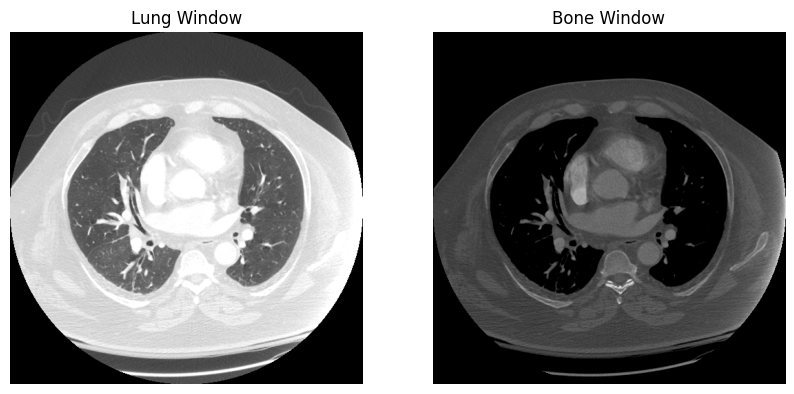

Images saved successfully.


In [21]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import imageio

def apply_window(image, center, width):
    """
    Apply intensity windowing to the DICOM image.

    :param image: The input 2D numpy array (the DICOM image pixel data).
    :param center: The center of the window.
    :param width: The width of the window.
    :return: The windowed image as a 2D numpy array.
    """
    min_value = center - width // 2
    max_value = center + width // 2
    windowed_image = np.clip(image, min_value, max_value)
    windowed_image = np.interp(windowed_image, (min_value, max_value), (0, 65535)).astype(np.uint16)
    return windowed_image

# Assuming `middle_slice` is your DICOM slice of interest
pixel_data = middle_slice.pixel_array

# Convert to Hounsfield units (HU), if necessary
if hasattr(middle_slice, 'RescaleSlope'):
    pixel_data = pixel_data * middle_slice.RescaleSlope + middle_slice.RescaleIntercept

# Window settings for lung and bone
lung_window_center, lung_window_width = -600, 1500
bone_window_center, bone_window_width = 400, 1800

# Apply the lung and bone windows
lung_image = apply_window(pixel_data, lung_window_center, lung_window_width)
bone_image = apply_window(pixel_data, bone_window_center, bone_window_width)

# Visualize the images in a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(lung_image, cmap='gray')
axs[0].set_title('Lung Window')
axs[0].axis('off')

axs[1].imshow(bone_image, cmap='gray')
axs[1].set_title('Bone Window')
axs[1].axis('off')

plt.show()

# Save the images as 16-bit PNG
imageio.imwrite('lung_window.png', lung_image)
imageio.imwrite('bone_window.png', bone_image)

print("Images saved successfully.")


In [1]:
pip install fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 14.5 MB/s eta 0:00:00
  Installing build depende

# Part 3. Semantic segmentation model development

*Load only person, cat and car classes from coco-2017. Create train and test separation.*

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz

# Load dataset
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="test",
    label_types=["segmentations"],
    classes=["person", "cat", "car"],
    max_samples=300
)

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["segmentations"],
    classes=["person", "cat", "car"],
    max_samples=300
)

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["segmentations"],
    classes=["person", "cat", "car"],
    max_samples=300
)

Migrating database to v0.23.7


INFO:fiftyone.migrations.runner:Migrating database to v0.23.7


INFO:fiftyone.zoo.datasets:Downloading split 'test' to '/root/fiftyone/coco-2017/test' if necessary


Test split is unlabeled; ignoring classes requirement


INFO:fiftyone.utils.coco:Downloading test info to '/root/fiftyone/coco-2017/tmp-download/image_info_test2017.zip'


 100% |██████|    8.7Mb/8.7Mb [1.3s elapsed, 0s remaining, 6.7Mb/s]      


INFO:eta.core.utils: 100% |██████|    8.7Mb/8.7Mb [1.3s elapsed, 0s remaining, 6.7Mb/s]      


Extracting test info to '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


INFO:fiftyone.utils.coco:Extracting test info to '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


INFO:fiftyone.utils.coco:Downloading 300 images


 100% |██████████████████| 300/300 [2.9m elapsed, 0s remaining, 1.7 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 300/300 [2.9m elapsed, 0s remaining, 1.7 images/s]      


Writing annotations for 300 downloaded samples to '/root/fiftyone/coco-2017/test/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 300 downloaded samples to '/root/fiftyone/coco-2017/test/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'test'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'test'


Dataset is unlabeled; ignoring classes requirement


 100% |█████████████████| 300/300 [130.0ms elapsed, 0s remaining, 2.4K samples/s]  


INFO:eta.core.utils: 100% |█████████████████| 300/300 [130.0ms elapsed, 0s remaining, 2.4K samples/s]  


Dataset 'coco-2017-test-300' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-test-300' created


INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [32.0s elapsed, 0s remaining, 99.6Mb/s]       


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [32.0s elapsed, 0s remaining, 99.6Mb/s]       


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 300 images


 100% |██████████████████| 300/300 [3.0m elapsed, 0s remaining, 1.7 images/s]    


INFO:eta.core.utils: 100% |██████████████████| 300/300 [3.0m elapsed, 0s remaining, 1.7 images/s]    


Writing annotations for 300 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 300 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |█████████████████| 300/300 [5.7s elapsed, 0s remaining, 50.6 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 300/300 [5.7s elapsed, 0s remaining, 50.6 samples/s]      


Dataset 'coco-2017-train-300' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-300' created


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 300 images


 100% |██████████████████| 300/300 [3.0m elapsed, 0s remaining, 1.6 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 300/300 [3.0m elapsed, 0s remaining, 1.6 images/s]      


Writing annotations for 300 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 300 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 300/300 [4.1s elapsed, 0s remaining, 77.6 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 300/300 [4.1s elapsed, 0s remaining, 77.6 samples/s]      


Dataset 'coco-2017-validation-300' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation-300' created


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Convolutional Block
def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, (3, 3), padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = tf.keras.activations.relu(x)

    x = Conv2D(num_filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = tf.keras.activations.relu(x)

    return x

# Encoder Block
def encoder_block(input_tensor, num_filters):
    x = conv_block(input_tensor, num_filters)
    p = MaxPooling2D((2, 2))(x)
    return x, p

# Decoder Block
def decoder_block(input_tensor, concat_tensor, num_filters):
    x = UpSampling2D((2, 2))(input_tensor)
    x = concatenate([x, concat_tensor], axis=-1)
    x = conv_block(x, num_filters)
    return x

# Build U-Net Model
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    # Encoder
    x1, p1 = encoder_block(inputs, 64)
    x2, p2 = encoder_block(p1, 128)
    x3, p3 = encoder_block(p2, 256)
    x4, p4 = encoder_block(p3, 512)

    # Bridge
    b = conv_block(p4, 1024)

    # Decoder
    d1 = decoder_block(b, x4, 512)
    d2 = decoder_block(d1, x3, 256)
    d3 = decoder_block(d2, x2, 128)
    d4 = decoder_block(d3, x1, 64)

    # Output
    if n_classes == 1:
        activation = 'sigmoid'  # Binary segmentation
    else:
        activation = 'softmax'  # Multi-class segmentation

    outputs = Conv2D(n_classes, (1, 1), activation=activation)(d4)

    model = Model(inputs, outputs)
    return model

# Model configuration
input_shape = (256, 256, 3)  # Adjust as needed
n_classes = 3  # Example: person, cat, car
model = build_unet(input_shape, n_classes)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Callbacks
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('model-unet.h5', verbose=1, save_best_only=True, save_weights_only=True)
]


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 tf.nn.relu (TFOpLambda)     (None, 256, 256, 64)         0         ['batch_normalization[0][0

In [4]:
import os
import numpy as np
import tensorflow as tf
from pycocotools.coco import COCO
from PIL import Image

def load_and_preprocess_image(path, target_size=(256, 256)):
    image = Image.open(path)
    image = image.resize(target_size)
    image = np.array(image)
    return image / 255.0

def transform_label(annotation):
    # Map COCO category IDs to your new label indices
    label_map = {1: 1, 17: 2, 3: 3}  # Assuming COCO IDs: 1 for person, 17 for cat, 3 for car
    return label_map.get(annotation, 0)  # Default to 0 (background) if not found

def load_and_preprocess_mask(coco, image_info, category_ids, target_size=(256, 256)):
    image_id = image_info['id']
    image_size = (image_info['height'], image_info['width'])
    mask = np.zeros(image_size, dtype=np.uint8)
    ann_ids = coco.getAnnIds(imgIds=image_id, catIds=category_ids, iscrowd=None)
    anns = coco.loadAnns(ann_ids)
    for ann in anns:
        category_id = ann['category_id']
        label = transform_label(category_id)
        m = coco.annToMask(ann) * label
        mask = np.maximum(mask, m)
    mask = Image.fromarray(mask)
    mask = mask.resize(target_size)
    mask = np.array(mask)
    return mask

def filter_categories(coco, categories):
    cat_ids = coco.getCatIds(catNms=categories)
    img_ids = coco.getImgIds(catIds=cat_ids)
    return cat_ids, img_ids

def create_dataset(coco, img_ids, cat_ids, root_dir, target_size=(256, 256), batch_size=32):
    def generator():
        for img_id in img_ids:
            img_info = coco.loadImgs(img_id)[0]
            path = os.path.join(root_dir, img_info['file_name'])
            image = load_and_preprocess_image(path, target_size)
            mask = load_and_preprocess_mask(coco, img_info, cat_ids, target_size)
            yield image, mask

    dataset = tf.data.Dataset.from_generator(
        generator,
        output_types=(tf.float32, tf.uint8),
        output_shapes=(tf.TensorShape([target_size[0], target_size[1], 3]), tf.TensorShape([target_size[0], target_size[1]]))
    )
    return dataset.batch(batch_size)

# Load COCO
coco_train = COCO('/root/fiftyone/coco-2017/train/labels.json')
coco_val = COCO('/root/fiftyone/coco-2017/test/labels.json')

# Filter by category
categories = ['person', 'cat', 'car']
train_cat_ids, train_img_ids = filter_categories(coco_train, categories)
val_cat_ids, val_img_ids = filter_categories(coco_val, categories)

# Create dataset
train_ds = create_dataset(coco_train, train_img_ids, train_cat_ids, '/root/fiftyone/coco-2017/train/data')
val_ds = create_dataset(coco_val, val_img_ids, val_cat_ids, '/root/fiftyone/coco-2017/test/data')


loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


*Train a U-net segmentation model*

In [15]:
# Define U-Net model
model = build_unet((256, 256, 3), n_classes=4)  # Including the background as a class
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('model-unet.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

# Train the model
results = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=callbacks)


Epoch 1/50
      1/Unknown - 12s 12s/step - loss: 1.8313 - accuracy: 0.1594

1/1 [==============================] - 13s 13s/step - loss: 1.8313 - accuracy: 0.1594
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 1.6288 - accuracy: 0.4120

1/1 [==============================] - 2s 2s/step - loss: 1.6288 - accuracy: 0.4120
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 1.3072 - accuracy: 0.4149

1/1 [==============================] - 2s 2s/step - loss: 1.3072 - accuracy: 0.4149
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 1.1483 - accuracy: 0.5530

1/1 [==============================] - 2s 2s/step - loss: 1.1483 - accuracy: 0.5530
Epoch 5/50
1/1 [==============================] - ETA: 0s - loss: 1.0422 - accuracy: 0.5828

1/1 [==============================] - 2s 2s/step - loss: 1.0422 - accuracy: 0.5828
Epoch 6/50
1/1 [==============================] - ETA: 0s - loss: 0.9713 - accuracy: 0.6438

1/1 [==============================] - 2s 2s/step - loss: 0.9713 - accuracy: 0.6438
Epoch 7/50
1/1 [==============================] - ETA: 0s - loss: 0.9197 - accuracy: 0.6860

1/1 [==============================] - 2s 2s/step - loss: 0.9197 - accuracy: 0.6860
Epoch 8/50
1/1 [==============================] - ETA: 0s - loss: 0.8813 - accuracy: 0.6989

1/1 [==============================] - 2s 2s/step - loss: 0.8813 - accuracy: 0.6989
Epoch 9/50
1/1 [==============================] - ETA: 0s - loss: 0.8309 - accuracy: 0.7170

1/1 [==============================] - 2s 2s/step - loss: 0.8309 - accuracy: 0.7170
Epoch 10/50
1/1 [==============================] - ETA: 0s - loss: 0.9045 - accuracy: 0.6769

1/1 [==============================] - 2s 2s/step - loss: 0.9045 - accuracy: 0.6769
Epoch 11/50
1/1 [==============================] - ETA: 0s - loss: 0.8096 - accuracy: 0.7141

1/1 [==============================] - 2s 2s/step - loss: 0.8096 - accuracy: 0.7141
Epoch 12/50
1/1 [==============================] - ETA: 0s - loss: 0.7868 - accuracy: 0.7200

1/1 [==============================] - 2s 2s/step - loss: 0.7868 - accuracy: 0.7200
Epoch 13/50
1/1 [==============================] - ETA: 0s - loss: 0.7535 - accuracy: 0.7356

1/1 [==============================] - 2s 2s/step - loss: 0.7535 - accuracy: 0.7356
Epoch 14/50
1/1 [==============================] - ETA: 0s - loss: 0.7189 - accuracy: 0.7499

1/1 [==============================] - 2s 2s/step - loss: 0.7189 - accuracy: 0.7499
Epoch 15/50
1/1 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.7753

1/1 [==============================] - 2s 2s/step - loss: 0.6841 - accuracy: 0.7753
Epoch 16/50
1/1 [==============================] - ETA: 0s - loss: 0.6493 - accuracy: 0.7874

1/1 [==============================] - 2s 2s/step - loss: 0.6493 - accuracy: 0.7874
Epoch 17/50
1/1 [==============================] - ETA: 0s - loss: 0.6374 - accuracy: 0.7896

1/1 [==============================] - 2s 2s/step - loss: 0.6374 - accuracy: 0.7896
Epoch 18/50
1/1 [==============================] - ETA: 0s - loss: 0.6245 - accuracy: 0.7899

1/1 [==============================] - 2s 2s/step - loss: 0.6245 - accuracy: 0.7899
Epoch 19/50
1/1 [==============================] - ETA: 0s - loss: 0.5725 - accuracy: 0.8138

1/1 [==============================] - 2s 2s/step - loss: 0.5725 - accuracy: 0.8138
Epoch 20/50
1/1 [==============================] - ETA: 0s - loss: 0.5475 - accuracy: 0.8261

1/1 [==============================] - 2s 2s/step - loss: 0.5475 - accuracy: 0.8261
Epoch 21/50
1/1 [==============================] - ETA: 0s - loss: 0.5487 - accuracy: 0.8187

1/1 [==============================] - 2s 2s/step - loss: 0.5487 - accuracy: 0.8187
Epoch 22/50
1/1 [==============================] - ETA: 0s - loss: 0.5012 - accuracy: 0.8401

1/1 [==============================] - 2s 2s/step - loss: 0.5012 - accuracy: 0.8401
Epoch 23/50
1/1 [==============================] - ETA: 0s - loss: 0.5060 - accuracy: 0.8359

1/1 [==============================] - 2s 2s/step - loss: 0.5060 - accuracy: 0.8359
Epoch 24/50
1/1 [==============================] - ETA: 0s - loss: 0.5345 - accuracy: 0.8200

1/1 [==============================] - 2s 2s/step - loss: 0.5345 - accuracy: 0.8200
Epoch 25/50
1/1 [==============================] - ETA: 0s - loss: 0.4605 - accuracy: 0.8552

1/1 [==============================] - 2s 2s/step - loss: 0.4605 - accuracy: 0.8552
Epoch 26/50
1/1 [==============================] - ETA: 0s - loss: 0.4883 - accuracy: 0.8441

1/1 [==============================] - 2s 2s/step - loss: 0.4883 - accuracy: 0.8441
Epoch 27/50
1/1 [==============================] - ETA: 0s - loss: 0.4906 - accuracy: 0.8355

1/1 [==============================] - 2s 2s/step - loss: 0.4906 - accuracy: 0.8355
Epoch 28/50
1/1 [==============================] - ETA: 0s - loss: 0.4291 - accuracy: 0.8621

1/1 [==============================] - 2s 2s/step - loss: 0.4291 - accuracy: 0.8621
Epoch 29/50
1/1 [==============================] - ETA: 0s - loss: 0.4831 - accuracy: 0.8403

1/1 [==============================] - 2s 2s/step - loss: 0.4831 - accuracy: 0.8403
Epoch 30/50
1/1 [==============================] - ETA: 0s - loss: 0.4122 - accuracy: 0.8655

1/1 [==============================] - 2s 2s/step - loss: 0.4122 - accuracy: 0.8655
Epoch 31/50
1/1 [==============================] - ETA: 0s - loss: 0.4104 - accuracy: 0.8661

1/1 [==============================] - 2s 2s/step - loss: 0.4104 - accuracy: 0.8661
Epoch 32/50
1/1 [==============================] - ETA: 0s - loss: 0.3891 - accuracy: 0.8757

1/1 [==============================] - 2s 2s/step - loss: 0.3891 - accuracy: 0.8757
Epoch 33/50
1/1 [==============================] - ETA: 0s - loss: 0.3688 - accuracy: 0.8797

1/1 [==============================] - 2s 2s/step - loss: 0.3688 - accuracy: 0.8797
Epoch 34/50
1/1 [==============================] - ETA: 0s - loss: 0.3538 - accuracy: 0.8876

1/1 [==============================] - 2s 2s/step - loss: 0.3538 - accuracy: 0.8876
Epoch 35/50
1/1 [==============================] - ETA: 0s - loss: 0.3389 - accuracy: 0.8958

1/1 [==============================] - 2s 2s/step - loss: 0.3389 - accuracy: 0.8958
Epoch 36/50
1/1 [==============================] - ETA: 0s - loss: 0.3297 - accuracy: 0.8946

1/1 [==============================] - 2s 2s/step - loss: 0.3297 - accuracy: 0.8946
Epoch 37/50
1/1 [==============================] - ETA: 0s - loss: 0.3211 - accuracy: 0.8960

1/1 [==============================] - 2s 2s/step - loss: 0.3211 - accuracy: 0.8960
Epoch 38/50
1/1 [==============================] - ETA: 0s - loss: 0.3069 - accuracy: 0.8966

1/1 [==============================] - 2s 2s/step - loss: 0.3069 - accuracy: 0.8966
Epoch 39/50
1/1 [==============================] - ETA: 0s - loss: 0.2873 - accuracy: 0.9070

1/1 [==============================] - 2s 2s/step - loss: 0.2873 - accuracy: 0.9070
Epoch 40/50
1/1 [==============================] - ETA: 0s - loss: 0.2784 - accuracy: 0.9107

1/1 [==============================] - 2s 2s/step - loss: 0.2784 - accuracy: 0.9107
Epoch 41/50
1/1 [==============================] - ETA: 0s - loss: 0.2695 - accuracy: 0.9147

1/1 [==============================] - 2s 2s/step - loss: 0.2695 - accuracy: 0.9147
Epoch 42/50
1/1 [==============================] - ETA: 0s - loss: 0.2586 - accuracy: 0.9187

1/1 [==============================] - 2s 2s/step - loss: 0.2586 - accuracy: 0.9187
Epoch 43/50
1/1 [==============================] - ETA: 0s - loss: 0.2484 - accuracy: 0.9208

1/1 [==============================] - 2s 2s/step - loss: 0.2484 - accuracy: 0.9208
Epoch 44/50
1/1 [==============================] - ETA: 0s - loss: 0.2436 - accuracy: 0.9235

1/1 [==============================] - 2s 2s/step - loss: 0.2436 - accuracy: 0.9235
Epoch 45/50
1/1 [==============================] - ETA: 0s - loss: 0.2290 - accuracy: 0.9283

1/1 [==============================] - 2s 2s/step - loss: 0.2290 - accuracy: 0.9283
Epoch 46/50
1/1 [==============================] - ETA: 0s - loss: 0.2231 - accuracy: 0.9316

1/1 [==============================] - 2s 2s/step - loss: 0.2231 - accuracy: 0.9316
Epoch 47/50
1/1 [==============================] - ETA: 0s - loss: 0.2110 - accuracy: 0.9355

1/1 [==============================] - 2s 2s/step - loss: 0.2110 - accuracy: 0.9355
Epoch 48/50
1/1 [==============================] - ETA: 0s - loss: 0.2076 - accuracy: 0.9360

1/1 [==============================] - 2s 2s/step - loss: 0.2076 - accuracy: 0.9360
Epoch 49/50
1/1 [==============================] - ETA: 0s - loss: 0.2190 - accuracy: 0.9290

1/1 [==============================] - 2s 2s/step - loss: 0.2190 - accuracy: 0.9290
Epoch 50/50
1/1 [==============================] - ETA: 0s - loss: 0.2544 - accuracy: 0.9132

1/1 [==============================] - 2s 2s/step - loss: 0.2544 - accuracy: 0.9132


In [16]:
model.save("bestModel.h5")

*Compute test performance as mean dice score and IOU*

In [47]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.cast(tf.reshape(y_true, [-1]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1]), tf.float32)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def mean_iou(y_true, y_pred):
    return tf.keras.metrics.MeanIoU(num_classes=4).update_state(y_true, y_pred)

def evaluate_model(test_ds, model):
    dice_scores = []
    iou_scores = []

    for images, true_masks in test_ds:
        pred_masks = model.predict(images)
        pred_masks = tf.argmax(pred_masks, axis=-1)
        for i in range(images.shape[0]):
            dice_score = dice_coefficient(true_masks[i], pred_masks[i])
            iou_score = mean_iou(true_masks[i], pred_masks[i])
            dice_scores.append(dice_score)
            iou_scores.append(iou_score)

    mean_dice_score = np.mean(dice_scores)
    mean_iou_score = np.mean(iou_scores)
    return mean_dice_score, mean_iou_score

# Load your trained model
model = tf.keras.models.load_model('bestModel.h5', custom_objects={'dice_coefficient': dice_coefficient})

# Assume 'val_ds' is your test dataset
mean_dice, mean_iou = evaluate_model(train_ds, model)
print(f'Mean Dice Score on Test Set: {mean_dice}')
print(f'Mean IoU Score on Test Set: {mean_iou}')

1/1 [==============================] - 0s 357ms/step
Mean Dice Score on Test Set: 1.0856175422668457
Mean IoU Score on Test Set: 4096.0
